## Simple Perceptron

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns; sns.set(style='white')
import warnings
warnings.filterwarnings('ignore')

In [6]:
class SimplePerceptron:
    def __init__(self, eta=.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            error = 0
            for xi, ti in zip(X, y):
                yi = self.predict(xi)
                update = self.eta * (ti - yi)
                self.w_[1:] += update * xi
                self.w_[0] += update
                error += int(update != 0)
            self.errors_ += error,
        return self

    def netInput(self, xi):
        return np.dot(xi, self.w_[1:]) + self.w_[0]

    def predict(self, xi):
        xx = self.netInput(xi)
        return np.where(xx <= -.5, -1, (np.where(xx > .5, 1, 0)))

In [7]:
class Perceptron:
    def __init__(self, split=.3, resolution=.02):
        self.split = split
        self.resolution = resolution

    def main(self):
        iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
        X = iris.iloc[:, [2,3]].values
        t = iris.iloc[:, 4].values
        classes = np.unique(t)
        y = np.where(t==classes[0], -1, (np.where(t==classes[1], 0, 1)))

        markers = ['s', 'x', '^', 'v', 'o']
        colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']

        # plot data
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
        for i, cls in enumerate(np.unique(t)):
            ax1.scatter(x=X[t == cls, 0], y=X[t == cls, 1], marker=markers[i], \
                        c=colors[i], label=cls)
        ax1.set_xlabel('petal length (cm)')
        ax1.set_ylabel('petal width (cm)')
        ax1.legend(loc='best')

        # plot training accuracy
        sp = SimplePerceptron()
        sp.fit(X, y)
        ax2.plot(range(1,len(sp.errors_)+1),sp.errors_, marker='o')
        ax2.set_xticks(range(1, len(sp.errors_)+1,1))
        ax2.set_xlabel('Epoche')
        ax2.set_ylabel('# Misclassification')
        plt.show()

        # plot decision region
        self.plotDecisionRegion(X=X, y=t, clf=sp, \
                                resolution=self.resolution)
        plt.xlabel('petal length (cm)')
        plt.ylabel('petal width (cm)')
        plt.legend(loc='best')
        plt.show()

    def plotDecisionRegion(self, X, y, clf, resolution):
        # design decision region
        x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
        x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), \
                               np.arange(x2_min, x2_max, resolution))
        xxx = np.array([xx1.ravel(), xx2.ravel()]).T
        Z = clf.predict(xxx)
        Z = Z.reshape(xx1.shape)

        markers = ['s', 'x', '^', 'v', 'o']
        colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # plot decision region
        plt.figure(figsize=(7,4))
        plt.contourf(xx1, xx2, Z, alpha=.4, cmap=cmap)
        for i,cls in enumerate(np.unique(y)):
            plt.scatter(x=X[y==cls,0], y=X[y==cls,1], marker=markers[i], \
                        c=cmap(i), alpha=.8, s=40, label=cls)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

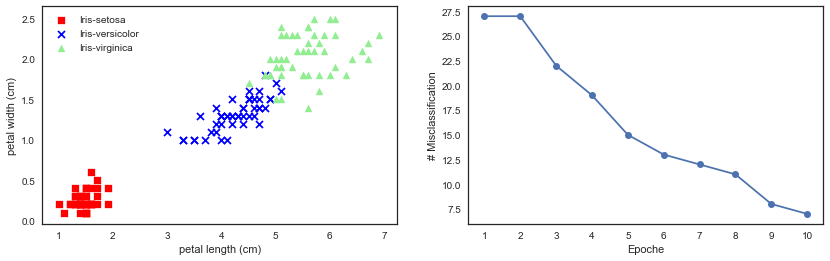

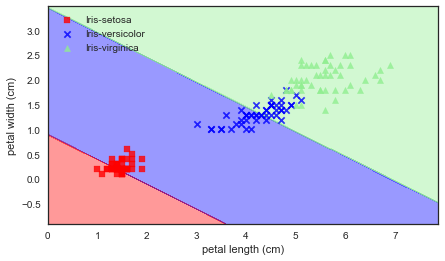

In [8]:
ppn = Perceptron()
ppn.main()

## Taylor Series
<p>The Taylor series of a real or complex-valued function f (x) that is infinitely differentiable at a real or complex number a is the power series </p>
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/46dd2bf78ad7d792988cf616a6ea94024f30b3d9' alt='Taylor series' align='middle' style='height:40px;' \>

<p>which can be written in the more compact sigma notation as</p>

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/b43af001b691a52034c46ff67dd15b4133285961' alt='Taylor series compact notation' align='middle' style='height:50px;' \>

In [9]:
import numpy as np
import sympy as sy
from sympy.functions import sin
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns; sns.set(style='whitegrid')
# plt.style.use('ggplot')
cmap = ListedColormap(sns.color_palette('Reds'))

In [10]:
class TaylorSeries:
    x = sy.Symbol('x')
    f = sin(x)
    
    def mainPlot(self, x=x):
        x_lims = [-5, 5]
        xx = np.linspace(x_lims[0], x_lims[1], 800)
        yy = []
        
        plt.figure(figsize=(6,6))
        for k in range(1,10,2):
            func = self.taylor(k)
            print('Taylor Expansion at n=' + str(k), func)
            for xi in xx:
                yy += func.subs(x,xi),
            plt.plot(xx, yy, c=cmap(k), label='order '+str(k))
            yy = []
        plt.plot(xx, np.sin(xx), 'b--', label='sin(x)')
        plt.xlim(x_lims)
        plt.ylim(x_lims)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Taylor Expansion Approximation')
        plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
        plt.show()
    
    def factorial(self, n):
        if n <= 0:
            return 1
        else:
            return n * self.factorial(n-1)
        
    # generate taylor expansion funtions
    def taylor(self, n, x=x, function=f, x0=0):
        i, p = 0, 0
        while i <= n:
            p = p + function.diff(x,i).subs(x,x0)*(x-x0)**i/self.factorial(i)
            i += 1
        return p

Taylor Expansion at n=1 x
Taylor Expansion at n=3 -x**3/6 + x
Taylor Expansion at n=5 x**5/120 - x**3/6 + x
Taylor Expansion at n=7 -x**7/5040 + x**5/120 - x**3/6 + x
Taylor Expansion at n=9 x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


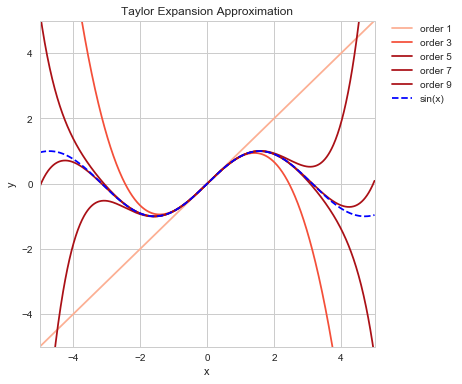

In [11]:
TaylorSeries().mainPlot()

## Decision Tree

In [12]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns; sns.set(style='white')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [15]:
class DecisionTree:
    def __init__(self, split=.3, resolution=.02):
        self.split = split
        self.resolution = resolution
        
    def main(self):
        iris = datasets.load_iris()
        X = iris.data[:, [2,3]]
        y = iris.target
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                            test_size=self.split, \
                                                            random_state=0)
        X_cmb = np.vstack((X_train, X_test))
        y_cmb = np.hstack((y_train, y_test))
        
        tree = DecisionTreeClassifier(criterion='entropy', \
                                      max_depth=3, \
                                      random_state=0)
        tree.fit(X_train, y_train)
        accuracy = tree.score(X_test, y_test)
        print('accuracy: {0:.2%}'.format(accuracy))
        
        self.plotDecisionRegion(X=X, y=y, clf=tree, X_test=X_test, \
                                resolution=self.resolution)
        plt.xlabel(iris.feature_names[2])
        plt.ylabel(iris.feature_names[3])
        plt.show()
        
    def plotDecisionRegion(self, X, y, clf, X_test, resolution):
        # design the decision region
        x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
        x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), \
                               np.arange(x2_min, x2_max, resolution))
        xxx = np.array([xx1.ravel(), xx2.ravel()]).T
        Z = clf.predict(xxx)
        Z = Z.reshape(xx1.shape)
        
        # plot the decision region
        markers = ['s','x','^','v','o']
        colors = ['red','blue','lightgreen','blue','cyan']
        cmap = ListedColormap(colors[:len(np.unique(y))])

        plt.contourf(xx1, xx2, Z, alpha=.4, cmap=cmap)
        for i,cls in enumerate(np.unique(y)):
            plt.scatter(x=X[y==cls,0], y=X[y==cls,1], alpha=.8, c=cmap(i), \
                        marker=markers[i], s=55, label=cls)
        # highlight X_test
        plt.scatter(X_test[:,0], X_test[:,1], c='', edgecolor='k',\
                    marker='o', s=60, linewidth=.6, label='testset')
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        plt.legend(loc='best')

accuracy: 97.78%


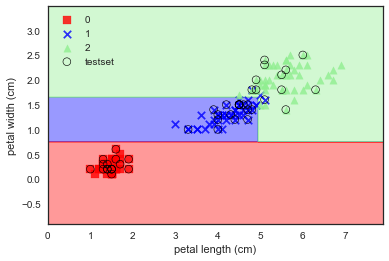

In [16]:
dt = DecisionTree()
dt.main()

## Support Vector Machine (SVM)

In [17]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns; sns.set(style='white')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [18]:
class SVM:
    def __init__(self, split=.3, resolution=.02):
        self.split = split
        self.resolution = resolution
        
    def main(self):
        iris = datasets.load_iris()
        X = iris.data[:, [2,3]]
        y = iris.target
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                            test_size=self.split, \
                                                            random_state=0)
        
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        X_cmb_std = np.vstack((X_train_std, X_test_std))
        y_cmb = np.hstack((y_train, y_test))
        
        svm = SVC(kernel='linear', C=1.0, random_state=0)
        svm.fit(X_train_std, y_train)
        accuracy = svm.score(X_test_std, y_test)
        print('accuracy: {0:.2%}'.format(accuracy))

        self.plotDecisionRegion(X=X_cmb_std, y=y_cmb, X_test=X_test_std, \
                                clf=svm, resolution=self.resolution)
        plt.xlabel(iris.feature_names[2])
        plt.ylabel(iris.feature_names[3])
        plt.show()
        
    def plotDecisionRegion(self, X, y, X_test, clf, resolution):
        # design the decision region
        x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
        x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), \
                               np.arange(x2_min, x2_max, resolution))
        xxx = np.array([xx1.ravel(), xx2.ravel()]).T
        Z = clf.predict(xxx)
        Z = Z.reshape(xx1.shape)
        
        # plot the decision region
        markers = ['s','x','^','v','o']
        colors = ['red','blue','lightgreen','gray','cyan']
        cmap = ListedColormap(colors[:len(np.unique(y))])
        
        plt.contourf(xx1, xx2, Z, alpha=.4, cmap=cmap)
        for i,cls in enumerate(np.unique(y)):
            plt.scatter(x=X[y==cls,0], y=X[y==cls,1], alpha=.5, c=cmap(i), \
                        marker=markers[i], s=55, label=cls)
        # highlight X_test
        plt.scatter(X_test[:,0], X_test[:,1], c='', edgecolor='k', \
                    marker='o', s=70, linewidth=.8, label='testset')
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        plt.legend(loc='best')

accuracy: 97.78%


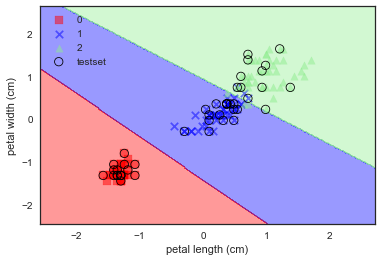

In [19]:
svm = SVM()
svm.main()

## K-Nearest Neighbor (KNN)

In [105]:
import numpy as np
import random

In [103]:
class SimpleKNN:
    def __init__(self, split=.3, k=3):
        self.split = split
        self.k = k
        
    def main(self):
        iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
        iris = iris.values
        trainSet, testSet = self.loadData(dataSet=iris)
        
        predictions = []
        for i,testInst in enumerate(testSet):
            neighbors = self.getNeightbors(trainSet, testInst, self.k)
            pred = self.getPrediction(testInst, neighbors)
            # print('True:', testInst[-1], 'Pred:', pred)
            if testInst[-1] != pred:
                print('{0} V : {1} X'.format(testInst[-1], pred))
            predictions += pred,
        acc = self.getAccuracy(testSet, predictions)
        print('Accuracy: {0:.2%}'.format(acc))
            
    def loadData(self, dataSet, trainSet=[], testSet=[]):
        for x in dataSet:
            if random.random() < self.split:
                trainSet += x,
            else:
                testSet += x,
        return trainSet, testSet
            
    def getNeightbors(self, trainSet, testInst, k):
        distances = []
        for trainInst in trainSet:
            distances += (trainInst, self.getDistances(trainInst, testInst)),
        distances.sort(key=lambda x: x[1])
        neighbors = []
        for (inst,d) in distances[:k]:
            neighbors += inst,
        return neighbors
        
    def getDistances(self, inst1, inst2):
        dist = 0
        for i in range(len(inst1)-1):
            dist += (inst1[i] - inst2[i])**2
        return dist**(1/2)

    def getPrediction(self, testInst, neighbors):
        classes = [x[-1] for x in neighbors]
        counts = {}
        for cls in classes:
            counts[cls] = counts.get(cls, 0) + 1
        countsSorted = sorted(counts.items(), key=lambda x: x[1], reverse=True)
        return countsSorted[0][0]
    
    def getAccuracy(self, testSet, predictions):
        correct = 0
        for i in range(len(testSet)):
            correct += int(testSet[i][-1] == predictions[i])
        return correct / len(testSet)            

In [104]:
sk = SimpleKNN()
sk.main()

Iris-versicolor V : Iris-virginica X
Iris-versicolor V : Iris-virginica X
Iris-versicolor V : Iris-virginica X
Accuracy: 97.14%


In [177]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns; sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [269]:
class KNN:
    def __init__(self, split=.3, resolution=.02):
        self.split = split
        self.resolution = resolution
        
    def main(self):
        columns = ['sepal_length(cm)', 'sepal_width(cm)', 'petal_length(cm)', 'petal_width(cm)', 'classes']
        iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', \
                           names=columns)
        # plot datas
        fg = sns.FacetGrid(data=iris, hue='classes', aspect=1.9)
        fg.map(plt.scatter, columns[2], columns[3], s=30).add_legend()
        plt.show()
        
        X = iris.iloc[:, [2,3]].values
        t = iris.iloc[:, 4].values
        classes = np.unique(t)
        y = np.where(t==np.unique(t)[0], -1, \
                     np.where(t==np.unique(t)[1], 0, 1))
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                            test_size=self.split, \
                                                            random_state=0)
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        X_cmb_std = np.vstack((X_train_std, X_test_std))
        y_cmb = np.hstack((y_train, y_test))
        
        knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
        knn.fit(X_train_std, y_train)
        acc = knn.score(X_test_std, y_test)
        print('Accuracy: {0:.2%}'.format(acc))
        
        knn2 = NearestNeighbors(n_neighbors=3)
        knn2.fit(X_train_std, y_train)
        
        self.plotDecisionRegion(X=X_cmb_std, y=y_cmb, t=t, X_test=X_test_std, \
                                clf=knn, resolution=self.resolution)
        plt.xlabel('petal_length(cm)')
        plt.ylabel('petal_width(cm)')
        plt.legend(bbox_to_anchor=(1, 1.05), loc='best')
        plt.show()
        
    def plotDecisionRegion(self, X, y, t, X_test, clf, resolution):
        # design the decision region
        x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
        x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), \
                               np.arange(x2_min, x2_max, resolution))
        xxx = np.array([xx1.ravel(), xx2.ravel()]).T
        Z = clf.predict(xxx)
        Z = Z.reshape(xx1.shape)
        
        # plot the decision region
        markers = ['s','x','^','v','o']
        colors = ['red','blue','lightgreen','gray','cyan']
        cmap = ListedColormap(colors[:len(np.unique(y))])
        
        plt.contourf(xx1, xx2, Z, alpha=.3, cmap=cmap)
        dic = dict(zip([-1,0,1], np.unique(t)))
        for i,cls in enumerate(np.unique(y)):
            plt.scatter(X[y==cls, 0], X[y==cls, 1], marker=markers[i], \
                        c=cmap(i), s=30, label=dic[cls])
        plt.scatter(X_test[:,0], X_test[:,1], c='', edgecolor='k', \
                    marker='o', s=60, linewidth=.6, label='X_test' )
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

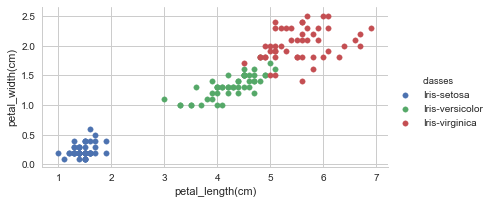

Accuracy: 97.78%


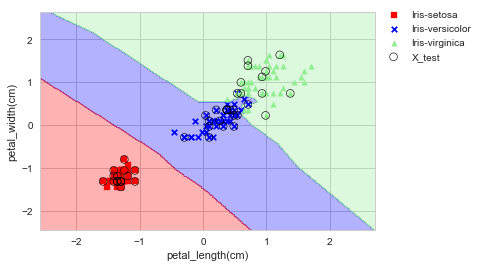

In [270]:
knn = KNN()
knn.main()

## Random Forest (RF)

In [282]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [327]:
class RandomForest:
    def __init__(self, split=.3, resolution=.02):
        self.split = split
        self.resolution = resolution
        
    def main(self):
        columns = ['Class_label','Alcohol','Malic_acid','Ash',\
                   'Alcalinity_of_ash','Magnesium','Total_phenols',\
                   'Flavanoids','Nonflavanoid_phenols','Proanthocyanins',\
                   'Color_intensity','Hue','OD280/OD315_of_diluted_wines','Proline']
        wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=columns)
        X = wine.iloc[:, 1:].values
        y = wine.iloc[:, 0].values
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                            test_size=self.split, \
                                                            random_state=0)
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        
        mms = MinMaxScaler()
        X_train_norm = mms.fit_transform(X_train)
        X_test_norm = mms.fit_transform(X_test)
        
        X_cmb_norm = np.vstack((X_train_norm, X_test_norm))
        y_cmb = np.hstack((y_train, y_test))
        
        features = np.array(columns[1:])
        rf = RandomForestClassifier(n_estimators=10000, \
                                    random_state=0, n_jobs=-1)
        rf.fit(X_cmb_norm, y_cmb)
        importances = rf.feature_importances_
        indices = np.argsort(importances)[::-1]
        for i,idx in enumerate(indices):
            print('{0:2d}) {1} {2}'.format(i+1, features[idx], \
                                           importances[idx]))
        plt.bar(range(X.shape[1]), importances[indices], \
                color='lightblue', align='center')
        plt.title('Feature Importances')
        plt.xticks(range(X.shape[1]), features[indices], rotation=90)
        plt.tight_layout()
        plt.show()

 1) Proline 0.17301109869312462
 2) Color_intensity 0.16865792195108995
 3) Flavanoids 0.14578333692202675
 4) Alcohol 0.1273257357777436
 5) OD280/OD315_of_diluted_wines 0.12363538572270873
 6) Hue 0.06679183827873889
 7) Total_phenols 0.05723654575855803
 8) Magnesium 0.03162733881973798
 9) Malic_acid 0.03125105771893158
10) Alcalinity_of_ash 0.02531874355774781
11) Proanthocyanins 0.021669594678204375
12) Ash 0.014523184377028488
13) Nonflavanoid_phenols 0.013168217744360399


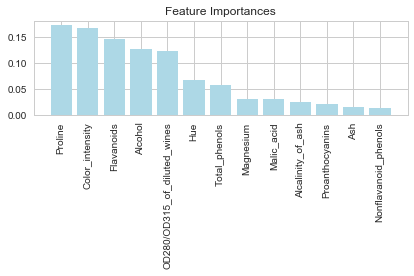

In [328]:
rf = RandomForest()
rf.main()